In [ ]:
!pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 10.8 MB/s eta 0:00:00


In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

weather = ctrl.Antecedent(np.arange(0, 4, 1), 'weather')
road_scenario = ctrl.Antecedent(np.arange(0,3 , 1), 'road_scenario')
temperature = ctrl.Antecedent(np.arange(-5, 40, 1), 'temperature')
speed = ctrl.Antecedent(np.arange(0, 150, 1), 'speed')
#driver_pref = ctrl.Antecedent(np.arange(0, 4, 1), 'driver_pref')
visibility = ctrl.Antecedent(np.arange(0, 2, 1), 'visibility')
#traffic = ctrl.Antecedent(np.arange(0, 3, 1), 'traffic')



window_heating_front = ctrl.Consequent(np.arange(0, 2, 1), 'window_heating_front')
window_heating_rear = ctrl.Consequent(np.arange(0, 2, 1), 'window_heating_rear')
ac = ctrl.Consequent(np.arange(0, 2, 1), 'ac')
lane_keeping_aid = ctrl.Consequent(np.arange(0, 2, 1), 'lane_keeping_aid')
suspension = ctrl.Consequent(np.arange(0, 2, 1), 'suspension')
start_stop = ctrl.Consequent(np.arange(0, 2, 1), 'start_stop')
parking_aid = ctrl.Consequent(np.arange(0, 2, 1), 'parking_aid')
camera = ctrl.Consequent(np.arange(0, 2, 1), 'camera')
fan = ctrl.Consequent(np.arange(0, 2, 1), 'fan')
voice_assistance = ctrl.Consequent(np.arange(0, 2, 1), 'voice_assistance')
seat_cooling = ctrl.Consequent(np.arange(0, 2, 1), 'seat_cooling')
seat_heating = ctrl.Consequent(np.arange(0, 2, 1), 'seat_heating')
steering_heating = ctrl.Consequent(np.arange(0, 2, 1), 'steering_heating')
ambient_light = ctrl.Consequent(np.arange(0, 2, 1), 'ambient_light')
driving_modes = ctrl.Consequent(np.arange(0, 2, 1), 'driving_modes')
navigation = ctrl.Consequent(np.arange(0, 2, 1), 'navigation')
sign_aided = ctrl.Consequent(np.arange(0, 2, 1), 'sign_aided')
auto = ctrl.Consequent(np.arange(0, 2, 1), 'auto')
temp_settings = ctrl.Consequent(np.arange(0, 2, 1), 'temp_settings')
recirculate = ctrl.Consequent(np.arange(0, 2, 1), 'recirculate')
email_messages = ctrl.Consequent(np.arange(0, 2, 1), 'email_messages')
music_player = ctrl.Consequent(np.arange(0, 2, 1), 'music_player')

speed['stopped'] = fuzz.trapmf(speed.universe, [0, 0, 2, 10])
speed['slow'] = fuzz.trapmf(speed.universe, [7, 10, 20, 30])
speed['medium'] = fuzz.trapmf(speed.universe, [25, 45, 75, 90])
speed['fast'] = fuzz.trapmf(speed.universe, [85, 100, 150, 150])

weather['clear'] = fuzz.trapmf(weather.universe, [0, 0, 0.5, 1])
weather['snow'] = fuzz.trapmf(weather.universe, [0, 0.5, 1.5, 2])
weather['rain'] = fuzz.trapmf(weather.universe, [1, 1.5, 2.5, 3])
weather['fog'] = fuzz.trapmf(weather.universe, [2, 2.5, 3, 3])

road_scenario['city'] = fuzz.trimf(road_scenario.universe, [0, 0, 1])
road_scenario['motorway'] = fuzz.trimf(road_scenario.universe, [0, 1, 2])
road_scenario['rural'] = fuzz.trimf(road_scenario.universe, [1, 2, 3])

temperature['frost'] = fuzz.trapmf(temperature.universe, [-5, -5, 2, 7])
temperature['low'] = fuzz.trapmf(temperature.universe, [5, 8, 15, 18])
temperature['normal'] = fuzz.trapmf(temperature.universe, [16, 19, 24, 25])
temperature['warm'] = fuzz.trapmf(temperature.universe, [24, 28, 40, 40])

#driver_pref['normal'] = fuzz.trimf(driver_pref.universe, [0, 0, 1])
#driver_pref['economy'] = fuzz.trimf(driver_pref.universe, [0, 1, 2])
#driver_pref['dynamic'] = fuzz.trimf(driver_pref.universe, [1, 2, 2])
#driver_pref['off_road'] = fuzz.trimf(driver_pref.universe, [2, 3, 3])

visibility['free'] = fuzz.trimf(visibility.universe, [0, 0, 1])
visibility['dark_limited'] = fuzz.trimf(visibility.universe, [0, 1, 1])

#traffic['free'] = fuzz.trimf(traffic.universe, [0, 0, 1])
#traffic['dense'] = fuzz.trimf(traffic.universe, [0, 1, 2])
#traffic['congestion'] = fuzz.trimf(traffic.universe, [1, 2, 2])

for var in [window_heating_front ,window_heating_rear , lane_keeping_aid,driving_modes,seat_heating, navigation ,sign_aided , ac, suspension, start_stop, parking_aid, camera, fan, voice_assistance, seat_cooling, steering_heating, ambient_light, temp_settings , auto , recirculate , email_messages, music_player]:
    var['off'] = fuzz.trimf(var.universe, [0, 0, 1])
    var['on'] = fuzz.trimf(var.universe, [0, 1, 1])



In [ ]:
rules = [
    ctrl.Rule(weather['snow'] | weather['rain'], (window_heating_front['on'], ac['on'], suspension['on'],window_heating_rear['on'])),
    ctrl.Rule(temperature['frost'], (window_heating_front['on'], ac['on'], seat_cooling['on'], suspension['on'], window_heating_rear['on'],auto['on'])),
    ctrl.Rule(temperature['low'], (start_stop['on'], parking_aid['on'], camera['on'], seat_cooling['on'], steering_heating['on'],auto['on'])),
    ctrl.Rule(temperature['normal'], (temp_settings['on'], seat_heating['on'], recirculate['on'])),
    ctrl.Rule(temperature['warm'], (temp_settings['on'],ac['on'], recirculate['on'])),
    ctrl.Rule(road_scenario['city'], (start_stop['on'], parking_aid['on'], camera['on'], fan['on'], voice_assistance['on'])),
    ctrl.Rule(road_scenario['motorway'], (lane_keeping_aid['on'], email_messages['on'])),
    ctrl.Rule(road_scenario['rural'], ( email_messages['on'],driving_modes['on'],sign_aided['on'],email_messages['on'])),
    ctrl.Rule(speed['fast'], (lane_keeping_aid['on'], steering_heating['on'],music_player['on'])),
    ctrl.Rule(speed['stopped'], (parking_aid['on'], camera['on'],navigation['on'], music_player['on'])),
    ctrl.Rule(speed['medium'], (driving_modes['on'],sign_aided['on'],email_messages['on'],music_player['on'] )),
    ctrl.Rule(visibility['dark_limited'], (ambient_light['on'])),
  #  ctrl.Rule(traffic['congestion'], (start_stop['off'])),
   # ctrl.Rule(driver_pref['free'], (start_stop['off'], parking_aid['off'])),
   # ctrl.Rule(driver_pref['moderate'], (window_heating['off'], ac['off'])),
   # ctrl.Rule(driver_pref['dynamic'], (voice_assistance['off'], fan['off']))
]

car_control_system = ctrl.ControlSystem(rules)
car_simulation = ctrl.ControlSystemSimulation(car_control_system)

car_simulation.input['weather'] =-5
car_simulation.input['road_scenario'] = 1
car_simulation.input['temperature'] = 0
car_simulation.input['speed'] = 2
#car_simulation.input['driver_pref'] = 2
car_simulation.input['visibility'] = 0
#car_simulation.input['traffic'] = 2



try:
    car_simulation.compute()
    outputs = ['window_heating_front', 'window_heating_rear', 'ac', 'suspension', 'start_stop', 'parking_aid', 'camera',
               'fan', 'voice_assistance', 'seat_cooling', 'steering_heating', 'ambient_light', 'temp_settings', 'recirculate',
               'lane_keeping_aid','seat_heating', 'email_messages', 'driving_modes', 'sign_aided', 'music_player', 'navigation', 'auto']
    for var in outputs:
        print(f"{var.replace('_', ' ').title()}: {car_simulation.output.get(var, 0)}")
except ValueError as e:
    print(f"Error: {e}")
    print("Please ensure all input variables have values before computing.")


Window Heating Front: 0.6666666666666666
Window Heating Rear: 0.6666666666666666
Ac: 0.6666666666666666
Suspension: 0.6666666666666666
Start Stop: 0
Parking Aid: 0.6666666666666666
Camera: 0.6666666666666666
Fan: 0
Voice Assistance: 0
Seat Cooling: 0.6666666666666666
Steering Heating: 0
Ambient Light: 0
Temp Settings: 0
Recirculate: 0
Lane Keeping Aid: 0.6666666666666666
Seat Heating: 0
Email Messages: 0.6666666666666666
Driving Modes: 0
Sign Aided: 0
Music Player: 0.6666666666666666
Navigation: 0.6666666666666666
Auto: 0.6666666666666666


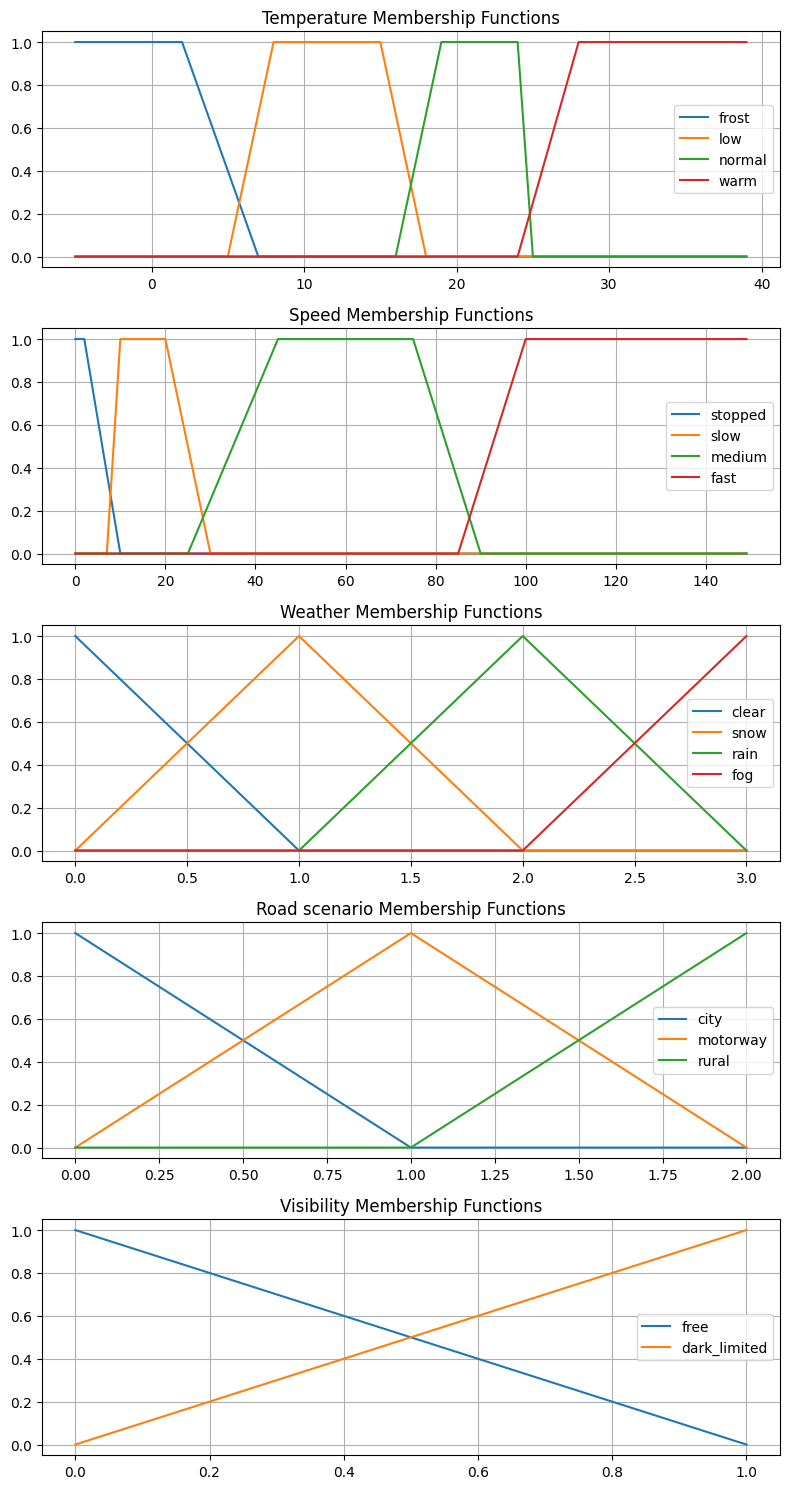

In [ ]:
import matplotlib.pyplot as plt
def plot_fuzzy_sets(fuzzy_vars):
    num_vars = len(fuzzy_vars)
    fig, axs = plt.subplots(num_vars, 1, figsize=(8, num_vars * 3))

    if num_vars == 1:
        axs = [axs]

    for ax, (name, var) in zip(axs, fuzzy_vars.items()):
        for label, mf in var.terms.items():
            ax.plot(var.universe, mf.mf, label=label)
        ax.set_title(f"{name.capitalize()} Membership Functions")
        ax.legend()
        ax.grid(True)

    plt.tight_layout()
    plt.show()


fuzzy_variables = {
    "Temperature": temperature,
    "Speed": speed,
    "Weather": weather,
    "Road Scenario": road_scenario,
    "Visibility": visibility
}

plot_fuzzy_sets(fuzzy_variables)

Hint how to use the variables
visibility :  0 for  free ,  1 for dark_limited
road_scenario :  0  for city , 1 for motorway , 2 for rural
weather : 0 for clear  , 1 for snow , 2 for rain , 3 fog
speed slow: below 30 km/h; medium: 30–90 km/h;  fast: ab:
Temperature (frost: below 5 °C; low: 5–18 °C, normal 18–25 °C;
warm: above 25 °C) aove 90 km/h; stopped


In [ ]:

car_simulation.input['weather'] =-5
car_simulation.input['road_scenario'] = 1
car_simulation.input['temperature'] = 0
car_simulation.input['speed'] = 2
#car_simulation.input['driver_pref'] = 2
car_simulation.input['visibility'] = 0
#car_simulation.input['traffic'] = 2



try:
    car_simulation.compute()
    outputs = [
        'window_heating_front', 'window_heating_rear', 'ac', 'suspension', 'start_stop', 'parking_aid', 'camera',
        'fan', 'voice_assistance', 'seat_cooling', 'steering_heating', 'ambient_light', 'temp_settings', 'recirculate',
        'lane_keeping_aid', 'seat_heating', 'email_messages', 'driving_modes', 'sign_aided', 'music_player', 'navigation', 'auto'
    ]

    for var in outputs:
        value = car_simulation.output.get(var, 0)
        status = "On" if value > 0.5 else "Off"
        print(f"{var.replace('_', ' ').title()}: {status}")

except ValueError as e:
    print(f"Error: {e}")
    print("Please ensure all input variables have values before computing.")


Window Heating Front: On
Window Heating Rear: On
Ac: On
Suspension: On
Start Stop: Off
Parking Aid: On
Camera: On
Fan: Off
Voice Assistance: Off
Seat Cooling: On
Steering Heating: Off
Ambient Light: Off
Temp Settings: Off
Recirculate: Off
Lane Keeping Aid: On
Seat Heating: Off
Email Messages: On
Driving Modes: Off
Sign Aided: Off
Music Player: On
Navigation: On
Auto: On
